In [19]:
import numpy as np
from scipy.signal import ss2tf
import matplotlib.pyplot as plt

# defining constants
m = 1888.6
lr = 1.39
lf = 1.55
C_alpha = 20000
Iz = 25854
f = 0.019

# for longitudinal dynamics
A_long = np.array([[0, 1],
                   [0, 0]])
B_long = np.array([[0, 0],
                   [0, 1/m]])
C_long = np.eye(2)

P_long = np.hstack([B_long, A_long@B_long])
Q_long = np.vstack([C_long, C_long@A_long])
print("Longitudinal Error Dynamics at x_dot = 2, 5 and 8 m/s")
print("Rank of controllability matrix:", np.linalg.matrix_rank(P_long))
print("Rank of observability matrix:", np.linalg.matrix_rank(Q_long))


x_dot = [2, 5, 8]
B_lat = np.array([[0, 0],
                  [2*C_alpha/m, 0],
                  [0, 0],
                  [2*C_alpha*lf/Iz, 0]])
C_lat = np.eye(4)
D_lat = np.zeros([4, 2])

for dx in x_dot:
    A_lat = np.array([[0, 1, 0, 0],
                      [0, -4*C_alpha/(m*dx), 4*C_alpha/m, -2*C_alpha*(lf - lr)/(m*dx)],
                      [0, 0, 0, 1],
                      [0, -2*C_alpha*(lf - lr)/(Iz*dx), 2*C_alpha*(lf - lr)/Iz, -2*C_alpha*(lf**2 + lr**2)/(Iz*dx)]])
    
    P_lat = np.hstack([B_lat, A_lat@B_lat, A_lat@A_lat@B_lat, A_lat@ A_lat@A_lat@B_lat])
    Q_lat = np.vstack([C_lat, C_lat@A_lat, C_lat@A_lat@A_lat, C_lat@A_lat@A_lat@A_lat])
    print("\nLateral Error Dynamics at x_dot = ", dx, "m/s")
    print("Rank of controllability matrix:", np.linalg.matrix_rank(P_lat))
    print("Rank of observability matrix:", np.linalg.matrix_rank(Q_lat))

Longitudinal Error Dynamics at x_dot = 2, 5 and 8 m/s
Rank of controllability matrix: 2
Rank of observability matrix: 2

Lateral Error Dynamics at x_dot =  2 m/s
Rank of controllability matrix: 4
Rank of observability matrix: 4

Lateral Error Dynamics at x_dot =  5 m/s
Rank of controllability matrix: 4
Rank of observability matrix: 4

Lateral Error Dynamics at x_dot =  8 m/s
Rank of controllability matrix: 4
Rank of observability matrix: 4


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
C:\Users\barat\AppData\Local\Temp\ipykernel_7032\1166234373.py:27: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("log$_1$$_0$($\sigma$$_1$/$\sigma$$_n$)")


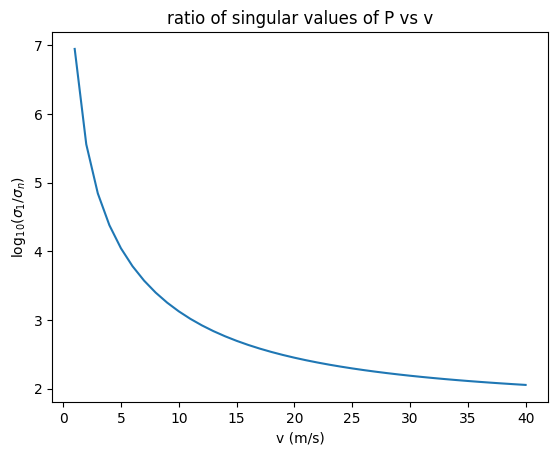

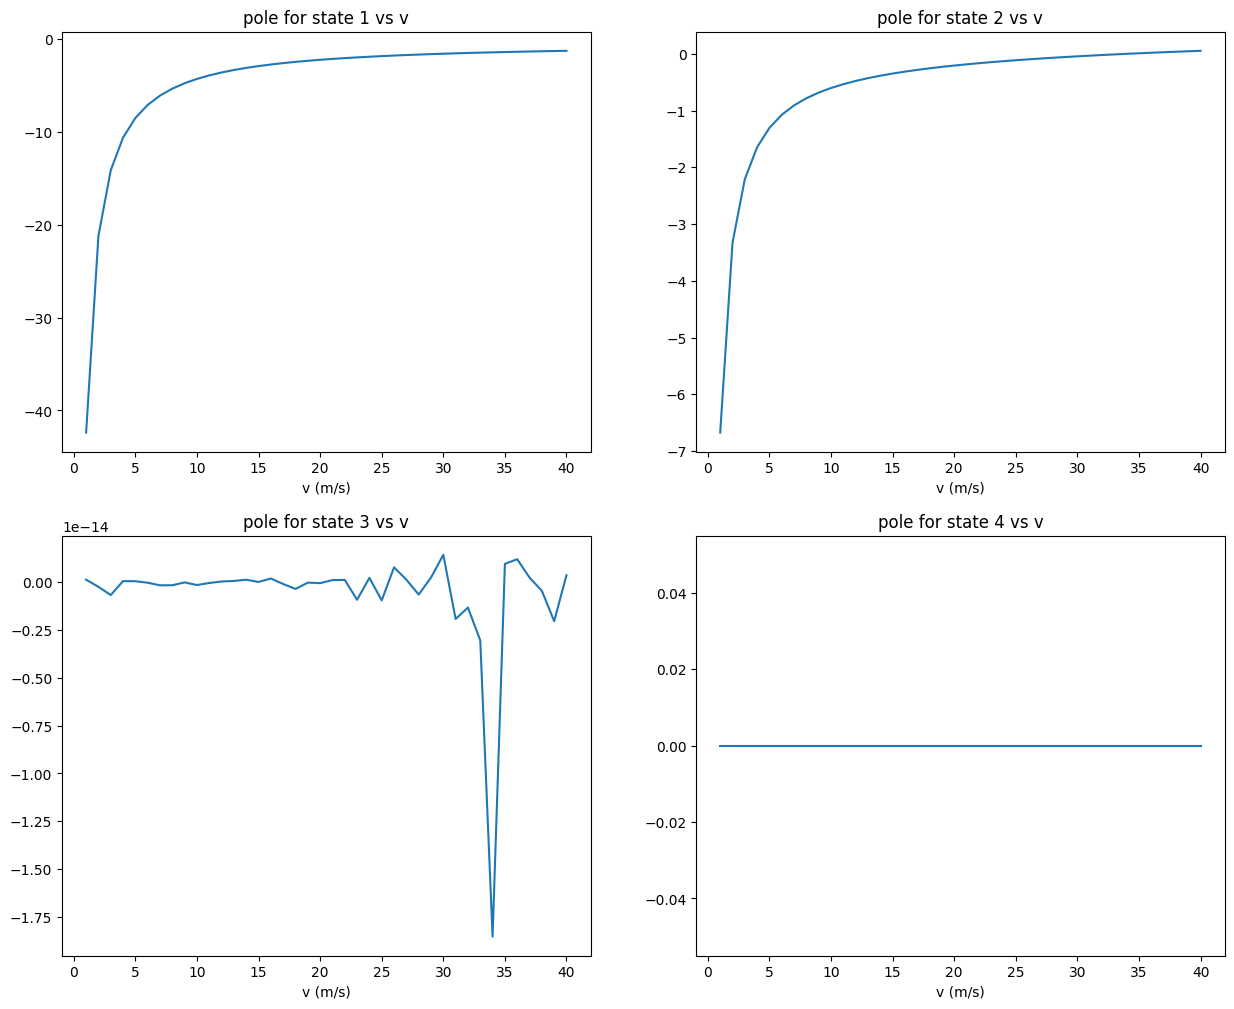

In [26]:
v = np.linspace(1, 40, 40)
log_svd = []
poles_real = []

for vel in v:
    A_lat = np.array([[0, 1, 0, 0],
                      [0, -4*C_alpha/(m*vel), 4*C_alpha/m, -2*C_alpha*(lf - lr)/(m*vel)],
                      [0, 0, 0, 1],
                      [0, -2*C_alpha*(lf - lr)/(Iz*vel), 2*C_alpha*(lf - lr)/Iz, -2*C_alpha*(lf**2 + lr**2)/(Iz*vel)]])
    B_lat = np.array([[0, 0],
                      [2*C_alpha/m, 0],
                      [0, 0],
                      [2*C_alpha*lf/Iz, 0]])
    
    P_lat = np.hstack([B_lat, A_lat@B_lat, A_lat@A_lat@B_lat, A_lat@ A_lat@A_lat@B_lat])

    _, sig, _ = np.linalg.svd(P_lat)
    log_svd.append(np.log10(sig[0]/sig[-1]))

    _, den = ss2tf(A_lat, B_lat, C_lat, D_lat)
    poles_real.append(np.roots(den).real)

poles_real = np.array(poles_real)

plt.plot(v, log_svd)
plt.xlabel("v (m/s)")
plt.ylabel("log$_1$$_0$($\sigma$$_1$/$\sigma$$_n$)")
plt.title("ratio of singular values of P vs v")
plt.show()

plt.figure(figsize = [15, 12])
plt.subplot(2, 2, 1)
plt.plot(v, poles_real[:, 0])
plt.xlabel("v (m/s)")
plt.title("pole for state 1 vs v")

plt.subplot(2, 2, 2)
plt.plot(v, poles_real[:, 1])
plt.xlabel("v (m/s)")
plt.title("pole for state 2 vs v")

plt.subplot(2, 2, 3)
plt.plot(v, poles_real[:, 2])
plt.xlabel("v (m/s)")
plt.title("pole for state 3 vs v")

plt.subplot(2, 2, 4)
plt.plot(v, poles_real[:, 3])
plt.xlabel("v (m/s)")
plt.title("pole for state 4 vs v")

plt.show()


# Conclusions

*From singular value plot*

As v increases, the ratio of singular values decreases, indicating that the controllability matrix becomes less well-conditioned at higher speeds. A high condition number (i.e., large difference between singular values) implies that we have stronger controllability. As the singular values get closer to each other, the system may become less controllable, or certain states might be harder to control at higher speeds.

*From eigenvalue plot*

The shift of some eigenvalues towards zero suggests that the system might become marginally stable or potentially uncontrollable at higher velocities. For State 3, the eigenvalue remains close to zero but exhibits some fluctuation, especially around v = 30 m/s. This could indicate a nearly uncontrollable or unobservable mode that becomes more prominent around this velocity. For State 4, the eigenvalue stays close to zero without much change, suggesting a static mode that may be inherently difficult to control or observe across all speeds.


Overall, these plots indicate that both controllability and observability might be compromised as the system operates at higher velocities, with certain modes potentially becoming unmanageable.